In [31]:
from sklearn.datasets import load_boston
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [32]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [33]:
data = pd.DataFrame(boston.data, columns=boston.feature_names)
price = pd.DataFrame(boston.target, columns=['prices'])
df = pd.concat([data,price], axis=1)
# для дальнейшей визуализации оставим 1 признак и отсортируем
df_sorted = df.sort_values(by='LSTAT')
X = pd.DataFrame(df_sorted['LSTAT'])
y = pd.Series(df_sorted['prices'])

In [40]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor


In [41]:
# построим деревья разной глубины
list_depth = [1,2,3,4,5,7]
dt_regs = {}
for i in list_depth:
    dt_regs[f'depth={i}'] = DecisionTreeRegressor(max_depth=i).fit(X, y)
dt_regs['depth=inf'] = DecisionTreeRegressor().fit(X, y)
dt_regs['reg'] = DecisionTreeRegressor(min_samples_leaf=3, criterion='mse').fit(X, y)

In [42]:
pred_list = {}
for key, cur_dt_reg in dt_regs.items():
      pred_list[key] = cur_dt_reg.predict(X)

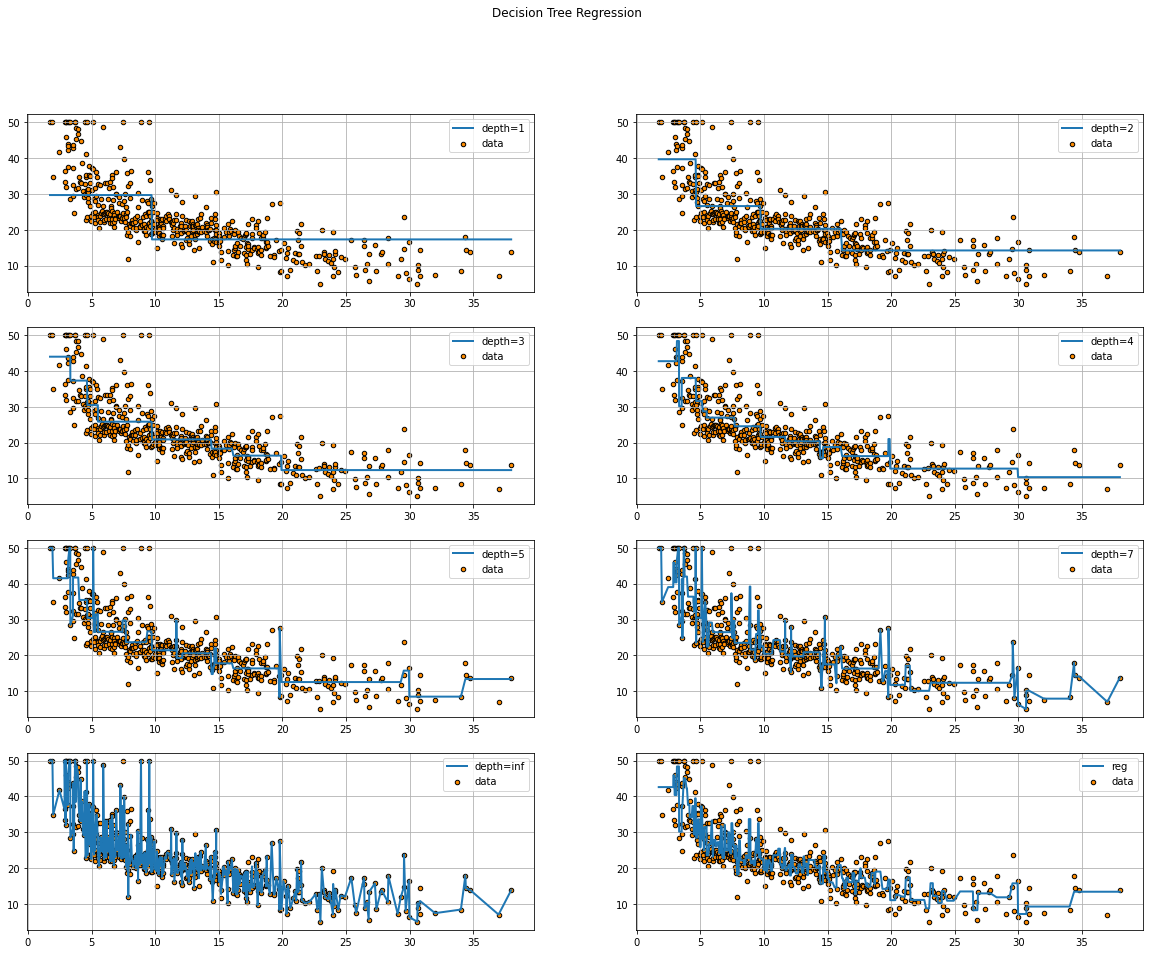

In [43]:

fig, axa = plt.subplots(4,2, figsize=(20,15))
for i, (key , cur_pred) in enumerate(pred_list.items()):
    ax = axa[i//2,i%2]
    ax.scatter(X, y, s=20, edgecolor="black",c="darkorange", label="data")
    ax.plot(X, cur_pred,label=f"{key}", linewidth=2)
    ax.grid()
    ax.legend()

fig.suptitle("Decision Tree Regression")
plt.show()

In [44]:
from sklearn.model_selection import train_test_split 

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
# построим деревья с разными критериями
regressor1 = DecisionTreeRegressor(random_state = 0, criterion='mse', max_depth=3) 
regressor2 = DecisionTreeRegressor(random_state = 0, criterion='mae', max_depth=3) 

In [47]:
regressor1.fit(X_train, y_train)
regressor2.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mae', max_depth=3, random_state=0)

In [48]:
regressor1.score(X_train, y_train)

0.7015052316312447

In [49]:
regressor2.score(X_train, y_train)

0.6789599236957097

In [51]:
regressor1.score(X_test, y_test)

0.6446857938920367

In [52]:
regressor2.score(X_test, y_test)

0.5873327491490007

In [16]:
# визуализируем дерево глубины 3 с критерием mse
from sklearn.tree import export_graphviz

def get_tree_dot_view(clf, feature_names=None, class_names=None):
    print(export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

In [27]:
clf = DecisionTreeRegressor(criterion='mse', max_depth=3, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

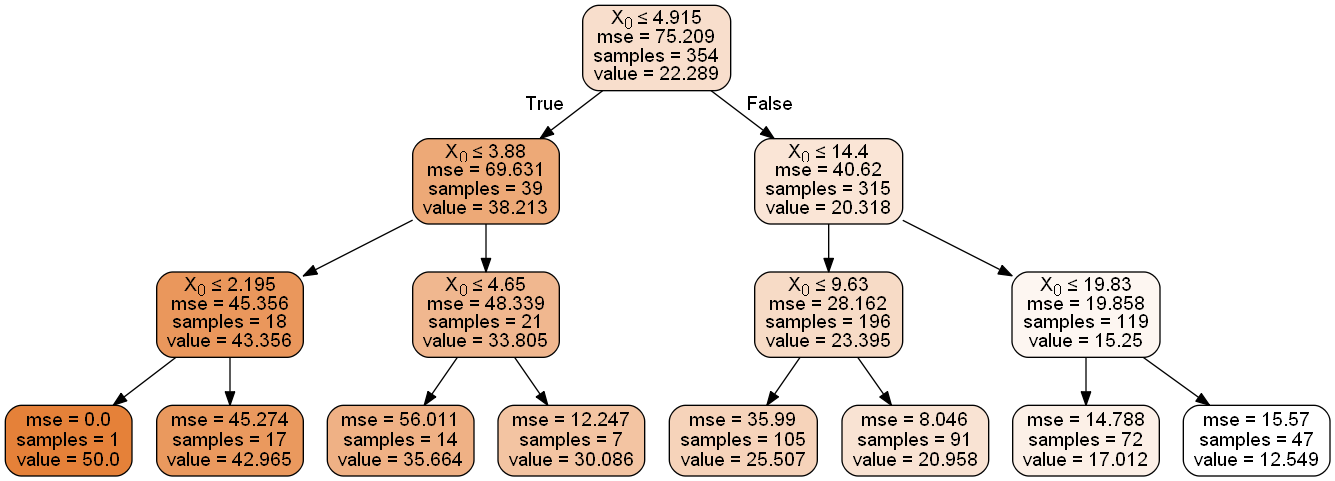

In [28]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())